In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("weatherHistory.csv")

In [ ]:
X = data.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply K-means clustering for different values of K and calculate SSE
sse = []
max_k = 10
for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

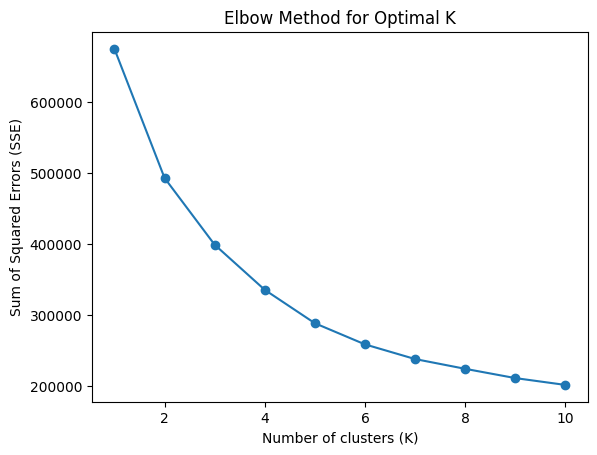

In [ ]:
# Plot SSE graph
plt.plot(range(1, max_k+1), sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# Based on the elbow method, let's choose K = 3
k = 3
# Apply K-means clustering with chosen K
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

In [ ]:
# Display cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster Centers:
[[ 1.93241309e+01  1.92281009e+01  6.19093411e-01  1.09285398e+01
   1.90928684e+02  1.24202007e+01  0.00000000e+00  1.01531172e+03]
 [ 4.22002587e+00  2.12729977e+00  8.56404037e-01  1.06331425e+01
   1.83759114e+02  8.24562196e+00  0.00000000e+00  1.01838876e+03]
 [ 1.07057928e+01  9.13331177e+00  7.30054348e-01  1.27563000e+01
   1.93510093e+02  7.79356250e+00  0.00000000e+00 -6.70752343e-12]]


In [ ]:
# Display number of data points in each cluster
print("\nNumber of data points in each cluster:")
print(data['Cluster'].value_counts())


Number of data points in each cluster:
Cluster
0    48576
1    46589
2     1288
Name: count, dtype: int64


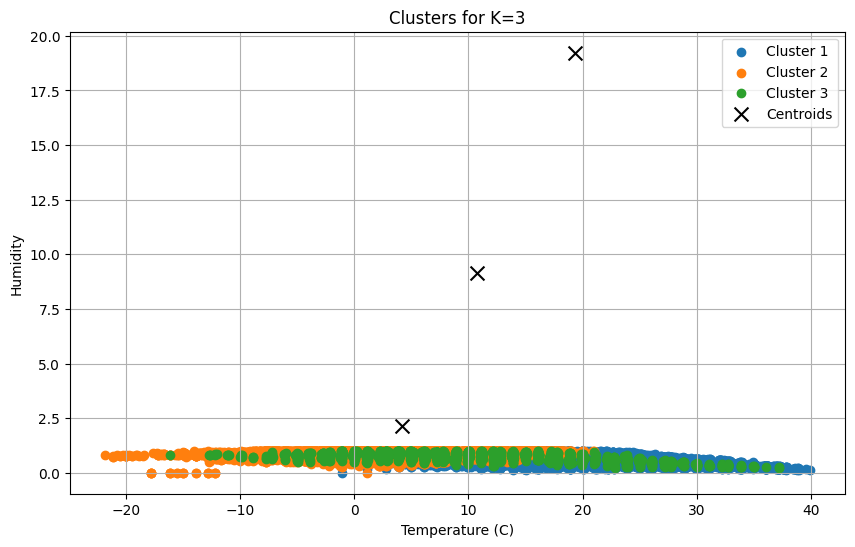

In [ ]:
# Plot the clusters for K=3
plt.figure(figsize=(10, 6))

# Plot data points with different colors for each cluster
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Temperature (C)'], cluster_data['Humidity'], label=f'Cluster {cluster+1}')

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')

plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Clusters for K=3')
plt.legend()
plt.grid(True)
plt.show()